In [177]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import cluster, datasets
import warnings; warnings.simplefilter('ignore')

In [178]:
#Import data
df = pd.read_csv('https://raw.githubusercontent.com/rizkyazriel/FlipClass-Data-Mining-2/main/Data%20Flip%20Class%202.csv')

In [179]:
N, P = df.shape
print(f"Baris: {N}, kolom: {P}")

Baris: 200, kolom: 10


In [180]:
df

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31,4098360,73,1,Depok,1.0,Senin,0
196,297,Pria,57,15983606,51,1,Jakarta,1.0,Minggu,5
197,298,Wanita,35,43032786,79,1,Depok,1.0,Senin,7
198,299,Wanita,23,1229508,94,1,Depok,0.0,Selasa,0


Text(0.5, 0, 'Pendapatan-per-bulan')

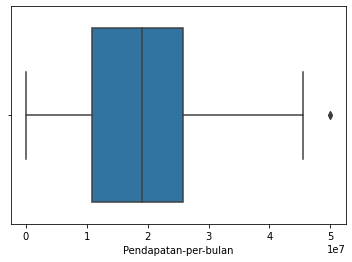

In [181]:
# Outlier di variabel Pendapatan per bulan
ax = sns.boxplot(x=df["Pendapatan-per-bulan"])
ax.set_xlabel('Pendapatan-per-bulan')

Dari data di atas terdapat outlier pada variabel pendapatan per bulan. Namun, setelah dilakukan pengecekan lagi terhadap variabel lain tidak ada yang memiliki outlier lagi.

##Preprocessing Data

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    200 non-null    int64  
 1   Jenis Kelamin         196 non-null    object 
 2   Umur                  200 non-null    object 
 3   Pendapatan-per-bulan  200 non-null    int64  
 4   skor-pengeluaran      200 non-null    int64  
 5   Menikah               188 non-null    object 
 6   Kota                  200 non-null    object 
 7   Promo                 194 non-null    float64
 8   HariFav               200 non-null    object 
 9   FavFlavor             200 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 15.8+ KB


In [183]:
df['Kota'] = df['Kota'].replace('JJakarta', 'Jakarta')

In [184]:
df['Kota'].value_counts()

Jakarta      88
Depok        59
Tangerang    53
Name: Kota, dtype: int64

In [185]:
# Mengoreksi tipe variabel
df['Kota'] = df['Kota'].astype('category')

In [186]:
df['FavFlavor'].value_counts()

0    40
2    20
6    20
3    20
7    20
5    20
4    20
1    20
8    19
9     1
Name: FavFlavor, dtype: int64

In [187]:
df['FavFlavor'] = df['FavFlavor'].replace(9, 8)

In [188]:
df['Promo'] = df['Promo'].replace(5.0, 1.0)

In [189]:
df['Jenis Kelamin'] = df['Jenis Kelamin'].replace('-', 'Pria')

In [190]:
df['Umur'] = df['Umur'].replace("35'", 35)

In [191]:
df['Menikah'].value_counts()

1    160
0     26
       1
-      1
Name: Menikah, dtype: int64

In [192]:
df['Menikah'] = df['Menikah'].replace("", 1)
df['Menikah'] = df['Menikah'].replace(" ", 1)
df['Menikah'] = df['Menikah'].replace("-", 1)

In [193]:
df['Umur'] = pd.to_numeric(df['Umur'])

In [194]:
df['Menikah'] = pd.to_numeric(df['Menikah'])
df['Menikah'] = df['Menikah'].astype('Int64')

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    200 non-null    int64   
 1   Jenis Kelamin         196 non-null    object  
 2   Umur                  200 non-null    int64   
 3   Pendapatan-per-bulan  200 non-null    int64   
 4   skor-pengeluaran      200 non-null    int64   
 5   Menikah               188 non-null    Int64   
 6   Kota                  200 non-null    category
 7   Promo                 194 non-null    float64 
 8   HariFav               200 non-null    object  
 9   FavFlavor             200 non-null    int64   
dtypes: Int64(1), category(1), float64(1), int64(5), object(2)
memory usage: 14.7+ KB


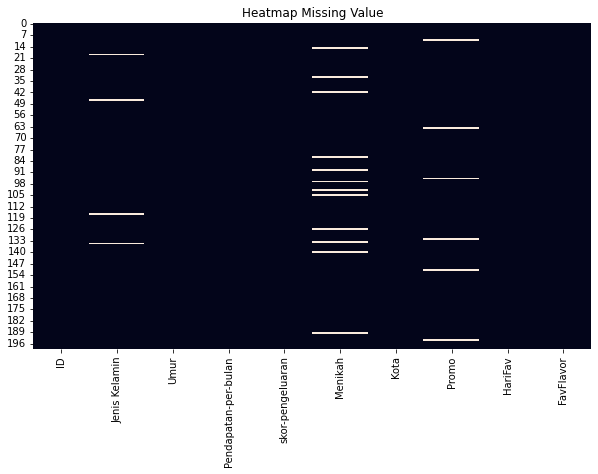

In [196]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [197]:
df[['Jenis Kelamin', 'Menikah', 'Promo']].isnull().sum()

Jenis Kelamin     4
Menikah          12
Promo             6
dtype: int64

In [198]:
df.fillna(method='ffill', axis=0, inplace=True)

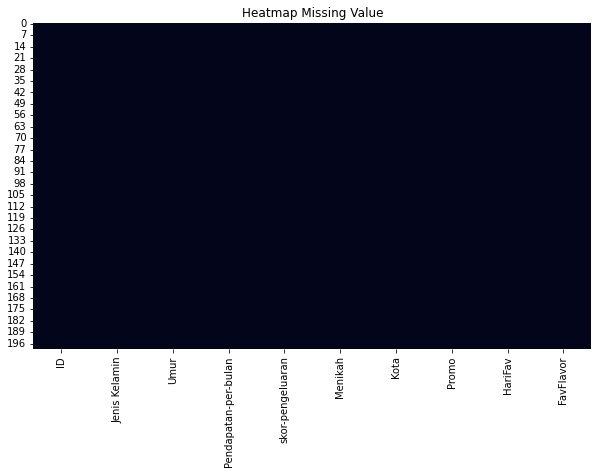

In [199]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

## EDA

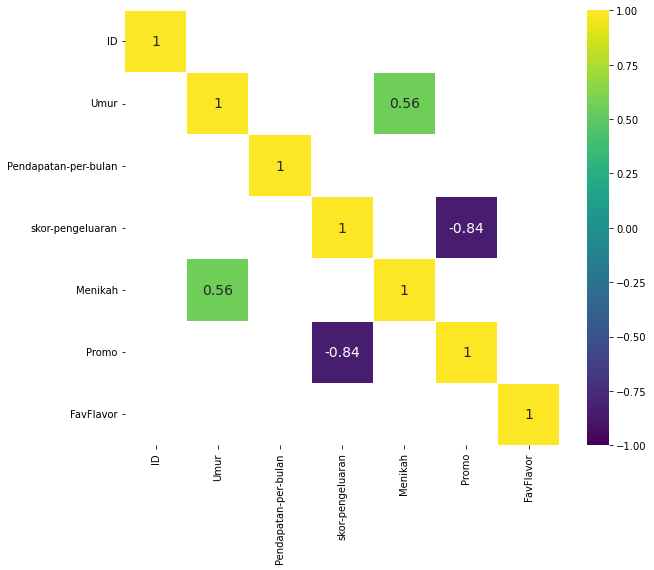

In [200]:
corr2 = df.corr() 
plt.figure(figsize=(10, 8))
sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);

Dari heatmap di atas, ternyata korelasi yang paling tinggi adalah antara menikah dengan umur. Hal ini berarti bahwa 

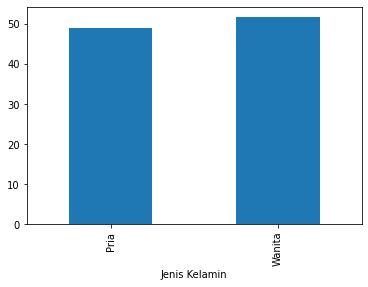

In [201]:
plotJK = df.groupby(['Jenis Kelamin']).mean()['skor-pengeluaran']
plotJK.plot.bar()
plt.show()

Berdasarkan histogram diatas diketahui bahwa jenis kelamin wanita lebih banyak pengeluaran dibandingkan jenis kelamin pria


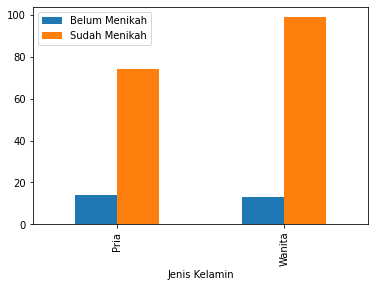

In [202]:
df.groupby(['Jenis Kelamin','Menikah']).size().unstack(fill_value=0).plot.bar()
plt.legend(['Belum Menikah', 'Sudah Menikah'])
plt.show()

Berdasarkan histogram diatas diketahui bahwa lebih banyak pria dan wanita yang sudah menikah dibandingkan yang belum menikah

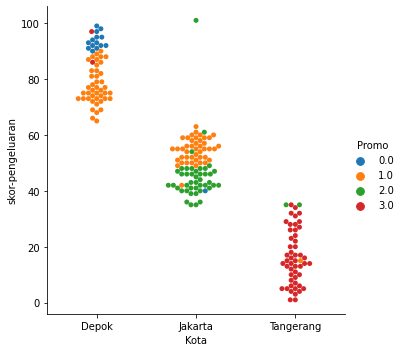

In [203]:
p1 = sns.catplot(x='Kota', y='skor-pengeluaran', hue='Promo', kind='swarm', data=df)

Berdasarkan plot diatas diketahui bahwa kota Tangerang memiliki skor pengeluaran yang paling terkecil dan banyak pengunjung yang menggunakan promo, kota Depok memiliki skor pengeluaran yang paling tertinggi dan banyak pengunjung yang jarang bahkan tidak pernah menggunakan promo, sedangkan kota Jakarta memiliki skor pengeluaran yang menengah dan jarang menggunakan promo.

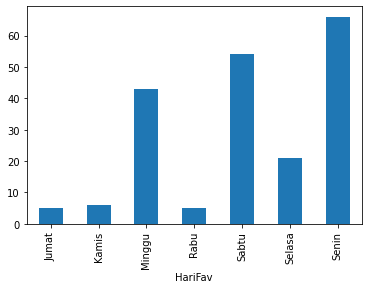

In [204]:
plotJK = df.groupby(['HariFav']).count()['Promo']
plotJK.plot.bar()
plt.show()

Dari histogram diatas diketahui bahwa penggunaan promo lebih sering digunakan pada hari senin

In [205]:
CT = pd.crosstab(index=df['FavFlavor'], columns=df['Jenis Kelamin'])
CT

Jenis Kelamin,Pria,Wanita
FavFlavor,,
0,22,18
1,9,11
2,6,14
3,8,12
4,7,13
5,12,8
6,9,11
7,7,13
8,8,12


Diketahui dari data diatas bahwa rasa yang paling favorit bagi pria dan wanita adalah vanila

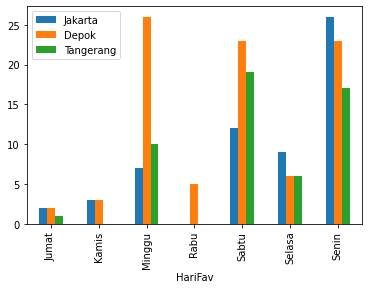

In [206]:
df.groupby(['HariFav','Kota']).size().unstack(fill_value=0).plot.bar()
plt.legend(['Jakarta', 'Depok', 'Tangerang', ])
plt.show()

Berdasarkan histogram di atas, terlihat hasil dari hari favorit untuk daerah Jakarta, Depok, dan Tangerang. Untuk Daerah Tangerang banyak dari pengunjung mixlTup memilih hari Sabtu sebagai hari favorit, sedangkan untuk daerah Jakarta banyak pengunjung mixlTup memilih hari Senin sebagai hari favorit, serta untuk daerah Depok banyak pengunjung mixlTup memilih hari Minggu sebagai hari favorit.

Selain itu, dari hasil histogram di atas, terlihat bahwa pengunjung mixlTup dari daerah Jakarta dan Tangerang tidak memilih hari rabu sebagai hari favorit hanya sedikit pengunjung dari daerah Depok yang memilih hari rabu sebagai hari favorit. Kemudian, dari histogram juga kita tahu bahwa dari ketiga kota tersebut sangat banyak pengunjung mixlTup yang memilih hari Senin sebagai hari favorit .



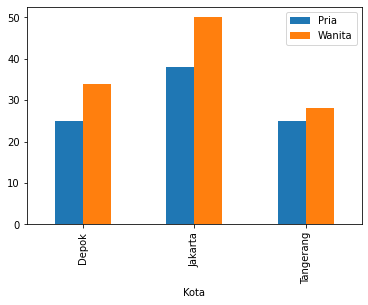

In [207]:
df.groupby(['Kota','Jenis Kelamin']).size().unstack(fill_value=0).plot.bar()
plt.legend(['Pria', 'Wanita'])
plt.show()

Dari hasil output di atas, terlihat banyaknya pengunjung yang berjenis kelamin pria dan wanita untuk daerah Depok, Tangerang, dan Jakarta. Dari ketiga daerah tersebut lebih banyak pengunjung wanita dibandingkan pria. 

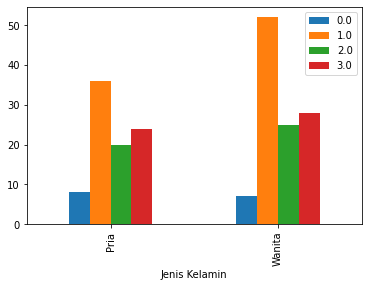

In [208]:
df.groupby(['Jenis Kelamin','Promo']).size().unstack(fill_value=0).plot.bar()
plt.legend(['0.0', '1.0', '2.0', '3.0'])
plt.show()

Dari hasil output di atas, terlihat bahwa kecenderungan wanita lebih banyak menggunakan promo dibandingkan dengan pria.  

## Segmentasi

In [210]:
# Membuat segmentasi pelanggan
X = df[['Pendapatan-per-bulan', 'Umur', 'skor-pengeluaran']]
X

,Pendapatan-per-bulan,Umur,skor-pengeluaran
0,13114754,49,52
1,33606557,32,86
2,15983606,51,41
3,12704918,19,55
4,20081967,38,42
...,...,...,...
195,4098360,31,73
196,15983606,57,51
197,43032786,35,79
198,1229508,23,94


In [214]:
# Normalisasi pada kolom Pendapatan-per-bulan
min_max_scaler = MinMaxScaler()
X_ = min_max_scaler.fit_transform(X)
X_ =  pd.DataFrame(X_, columns = ['Pendapatan','Umur','Skor'])
X_

,Pendapatan,Umur,Skor
0,0.262295,0.810345,0.51
1,0.672131,0.517241,0.85
2,0.319672,0.844828,0.40
3,0.254098,0.293103,0.54
4,0.401639,0.620690,0.41
...,...,...,...
195,0.081967,0.500000,0.72
196,0.319672,0.948276,0.50
197,0.860656,0.568966,0.78
198,0.024590,0.362069,0.93


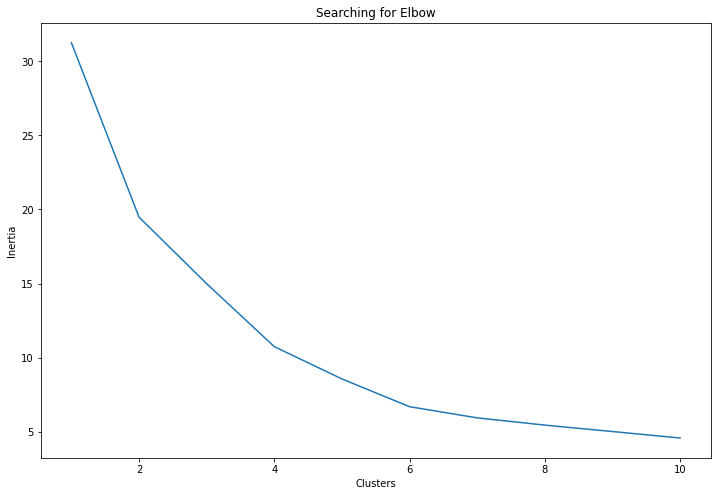

In [216]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X_)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()

array([0, 2, 0, 3, 0, 2, 3, 3, 3, 3], dtype=int32)

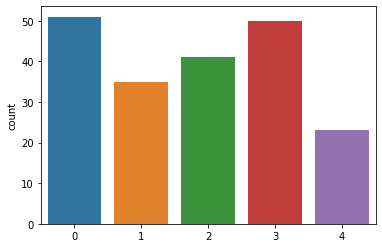

In [233]:
k=5
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = 0)
kmPP.fit(X_)
C_kmpp = kmPP.predict(X_)

sns.countplot(x=C_kmpp)
C_kmpp[:10]

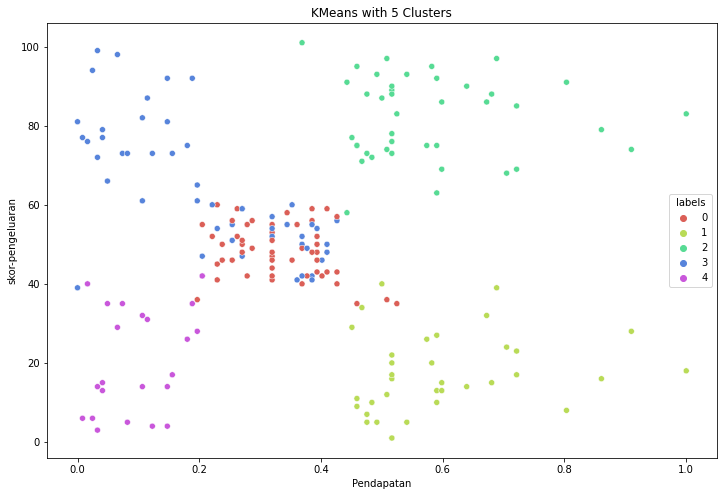

In [234]:
X_['labels'] = pd.DataFrame(C_kmpp, columns = ['labels'])
plt.figure(figsize=(12, 8))
sns.scatterplot(X_['Pendapatan'], df['skor-pengeluaran'], hue=X_['labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()


- `Label 0` is gaji sedang dan pengeluaran sedang
- `Label 1` is gaji tinggi dan pengeluaran rendah
- `Label 2` is gaji tinggi dan pengeluaran tinggi
- `Label 3` is gaji rendah-menengah dan pengeluaran tinggi
- `Label 4` is gaji rendah dan pengeluaran rendah

#Kesimpulan dan Saran

Berdasarkan hasil dari visualisasi dan clustering yang telah kami lakukan, didapatkan :
1. Wanita lebih banyak pengeluaran dibandingan pria
2. Pria dan wanita yang sudah menikah lebih banyak dibandingkan yang belum menikah
3. Kota Depok memiliki skor pengeluaran tertinggi dan banyak pengunjung yang jarang bahkan tidak pernah memakai promo
4. Penggunaan promo lebih sering digunakan di hari senin
5. Rasa yang paling favorit bagi pria dan wanita adalah rasa vanila
6. Hari senin menjadi hari favorit karena paling banyak didatangi pengunjung dari 3 kota yaitu Tangerang, Depok, dan Jakarta
7. Pengunjung wanita lebih banyak dari pada pengunjung pria
8. Wanita lebih sering menggunakan promo dibandingkan pria

Dari beberapa kesimpulan di atas, kami menyarankan kepada perusahaan mixlTup untuk dapat menginvestasikan atau memperluas bisnisnya ke kota - kota yang memiliki tingkat populasi wanita yang lebih tinggi dibandingkan pria. Dengan hal ini, kami meriset kota mana saja yang sesuai dengan kriteria tersebut yakni Yogyakarta. 

Selain itu, karena vanila menjadi rasa favorit bagi para pengunjung, kami menyarankan agar perusahaan mixlTup dapat mencari inovasi dalam hal penyajian varian selain rasa vanila agar varian-varian rasa lain juga dapat laris terjual dan meningkatkan jumlah income bagi perusahaan.

Dalam hal promo, kami menyarankan agar perusahaan dapat memberikan promo di hari-hari selain hari senin agar penjualan di hari selain senin juga meningkat, selain itu, masih dalam hal promo kami juga menyarankan agar perusahaan dapat menginovasi bentuk-bentuk promo bagi kalangan pengunjung pria, sehingga dapat menarik konsumen pria untuk dapat tertarik membeli produk dari perusahaan mixlTup. Dari data kita juga mengetahui bahwa pengunjung yang datang lebih banyak yang sudah menikah, dengan itu kami menyarankan bagi perusahaan mixlTup untuk membuat promo-promo bertemakan keluarga supaya lebih menarik perhatian bagi para pengunjung. 